# Data Preparation

Tareas por realizar en la etapa de preparacion:

- Seleccion de datos relevantes
- limpieza de los datos (missing values, outliers)
- Construir nuevas variables (feature engineering)
- Integrar datos de múltiples fuentes
- Formatear y transformar datos

In [1]:
%load_ext kedro.ipython 
catalog.keys()

[09/16/25 22:59:34] INFO     Using                                                                  ]8;id=194841;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=474339;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.                
                             venv\Lib\site-packages\kedro\framework\project\rich_logging.yml' as                   
                             logging configuration.                                                                

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=813836;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=343473;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=658319;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=781712;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=644660;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=244478;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project.                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/16/25 22:59:37] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=573888;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=316184;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[09/16/25 22:59:39] INFO     Kedro project machine_learning_project                                 ]8;id=360340;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=993808;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=91319;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=694734;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters'
]

In [2]:
FIFA22_df = catalog.load("DataSetFIFA22")
FIFA21_df = catalog.load("DataSetFIFA21")
FIFA20_df = catalog.load("DataSetFIFA20")

[09/16/25 22:59:40] INFO     Loading data from DataSetFIFA22 (CSVDataset)...                   ]8;id=181219;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=214833;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from DataSetFIFA21 (CSVDataset)...                   ]8;id=193661;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=58613;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from DataSetFIFA20 (CSVDataset)...                   ]8;id=214741;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=966531;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Seleccion de datos relevantes**

### **Columnas eliminadas**

Identificadores / texto libre / URLs:
ID, Name, Photo, Flag, Club Logo. No aportan 

In [64]:
FIFA22_df.drop(columns=['Photo'], inplace=True)
FIFA22_df.drop(columns=['Flag'], inplace=True)
FIFA22_df.drop(columns=['Club Logo'], inplace=True)

Marking es la capacidad de marcar o defender del jugador, por lo que es una caracteristica que solo lo tienen jugadores de cierta posicion defensiva, por lo que al ser una variable que influye, se le ingresara valores cero a los datos nulos 

#### **Limpieza de los datos (missing values, outliers)**

<Axes: xlabel='Age'>

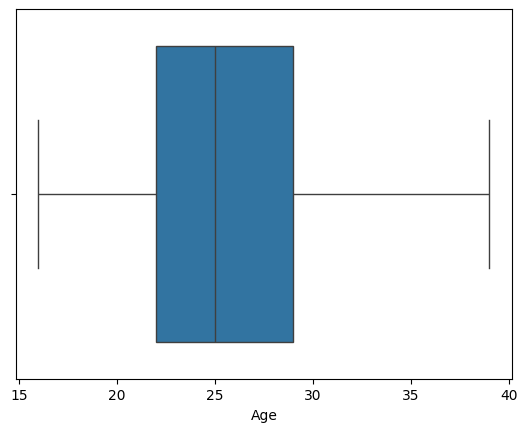

In [70]:
FIFA22_df.drop(FIFA22_df[FIFA22_df['Age'] >=40 ].index, inplace=True)
FIFA22_df.shape
sns.boxplot(x=FIFA22_df['Age'])

#### **Feature engineering**

explica el proposito

Promedio de habilidades ofensivas: Con las caracteristicas del jugador ofensivo (ataque) a partir de las caracteristicas de Finishing, Dribbling y ShotPower para  crea una variable llamada Offensive_Skills O Habilidades ofensivas la cual calcula el promedio ofe

Promedio de habilidades defensivas: 

In [89]:
FIFA22_df['Offensive_Skills'] = FIFA22_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA22_df['Defensive_Skills'] = FIFA22_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)


#### **Integrar datos de múltiples fuentes**

#### **Formatear y transformar datos**

In [65]:
print(FIFA22_df["Position"].head())

0    <span class="pos pos18">CAM
1    <span class="pos pos11">LDM
2     <span class="pos pos24">RS
3    <span class="pos pos13">RCM
4      <span class="pos pos7">LB
Name: Position, dtype: object


In [67]:
# Tomar los últimos 3 caracteres y eliminar espacios
FIFA22_df["Position"] = FIFA22_df["Position"].str[-3:].str.strip()
FIFA22_df["Position"] = FIFA22_df["Position"].str.replace(">", "", regex=False).str[-3:]

print(FIFA22_df["Position"].unique())
print(FIFA22_df["Position"].head())

['CAM' 'LDM' 'RS' 'RCM' 'LB' 'RDM' 'LCM' 'SUB' 'LS' 'RM' 'LCB' 'LM' 'RB'
 'CDM' 'RW' 'LW' 'ST' 'CM' 'RF' 'LWB' 'RAM' 'CF' 'RES' 'LF' 'RWB' 'CB'
 'RCB' nan 'LAM' 'GK']
0    CAM
1    LDM
2     RS
3    RCM
4     LB
Name: Position, dtype: object


Eliminar el formato de de **Value**, **Wage** y **Release Clause**

In [78]:
def money_to_number(s):
    """Convert '€110.5M','€500K','€1.2B' or numeric-like strings into float (euros)."""
    if pd.isna(s): return np.nan
    if isinstance(s, (int, float)): return float(s)
    s = str(s).strip().replace('€','').replace('£','').replace(' ','')
    if s == '': return np.nan
    try:
        if s.endswith('M'): return float(s[:-1]) * 1e6
        if s.endswith('K'): return float(s[:-1]) * 1e3
        if s.endswith('B'): return float(s[:-1]) * 1e9
        # remove non-numeric chars
        return float(re.sub(r'[^\d.]','', s))
    except:
        return np.nan

# monetary columns: 'Value', 'Wage', 'Release Clause' (from df.info)
for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA22_df.columns:
        newc = col + '_num'
        FIFA22_df[newc] = FIFA22_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA22_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA21_df.columns:
        newc = col + '_num'
        FIFA21_df[newc] = FIFA21_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA21_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA20_df.columns:
        newc = col + '_num'
        FIFA20_df[newc] = FIFA20_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA20_df[newc].notna().sum())

Created Value_num from Value - non-null: 16349
Created Wage_num from Wage - non-null: 14272
Created Release Clause_num from Release Clause - non-null: 14946
Created Value_num from Value - non-null: 16699
Created Wage_num from Wage - non-null: 13812
Created Release Clause_num from Release Clause - non-null: 15479
Created Value_num from Value - non-null: 16657
Created Wage_num from Wage - non-null: 13317
Created Release Clause_num from Release Clause - non-null: 14787


In [79]:
# FIFA 22
value_f22 = FIFA22_df['Value_num'].head(3)
wage_f22 = FIFA22_df['Wage_num'].head(3)
release_f22 = FIFA22_df['Release Clause_num'].head(3)

print("FIFA 22 - Value:\n", value_f22)
print("FIFA 22 - Wage:\n", wage_f22)
print("FIFA 22 - Release Clause:\n", release_f22)

# FIFA 21
value_f21 = FIFA21_df['Value_num'].head(3)
wage_f21 = FIFA21_df['Wage_num'].head(3)
release_f21 = FIFA21_df['Release Clause_num'].head(3)

print("\nFIFA 21 - Value:\n", value_f21)
print("FIFA 21 - Wage:\n", wage_f21)
print("FIFA 21 - Release Clause:\n", release_f21)

# FIFA 20
value_f20 = FIFA20_df['Value_num'].head(3)
wage_f20 = FIFA20_df['Wage_num'].head(3)
release_f20 = FIFA20_df['Release Clause_num'].head(3)

print("\nFIFA 20 - Value:\n", value_f20)
print("FIFA 20 - Wage:\n", wage_f20)
print("FIFA 20 - Release Clause:\n", release_f20)


FIFA 22 - Value:
 0    107500000.0
1     93000000.0
2     44500000.0
Name: Value_num, dtype: float64
FIFA 22 - Wage:
 0    250000.0
1    140000.0
2    135000.0
Name: Wage_num, dtype: float64
FIFA 22 - Release Clause:
 0    206900000.0
1    160400000.0
2     91200000.0
Name: Release Clause_num, dtype: float64

FIFA 21 - Value:
 0    31500000.0
1    87000000.0
2    63000000.0
Name: Value_num, dtype: float64
FIFA 21 - Wage:
 0    115000.0
1    370000.0
2    195000.0
Name: Wage_num, dtype: float64
FIFA 21 - Release Clause:
 0     64600000.0
1    161000000.0
2    124400000.0
Name: Release Clause_num, dtype: float64

FIFA 20 - Value:
 0    53000000.0
1    69000000.0
2    56500000.0
Name: Value_num, dtype: float64
FIFA 20 - Wage:
 0    350000.0
1    370000.0
2    165000.0
Name: Wage_num, dtype: float64
FIFA 20 - Release Clause:
 0    108700000.0
1    141500000.0
2    111600000.0
Name: Release Clause_num, dtype: float64


In [4]:
catalog.keys()


[
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20'
]

In [5]:
FIFA22_dfpr = catalog.load("preprocess_fifa_22")
FIFA21_dfpr = catalog.load("preprocess_fifa_21")
FIFA20_dfpr = catalog.load("preprocess_fifa_20")

[09/16/25 22:59:49] INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=604174;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=397063;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_21 (ParquetDataset)...          ]8;id=812162;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=579435;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_20 (ParquetDataset)...          ]8;id=250119;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=844634;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

### Mostrando los archivos parquet limpios o modificados

Se le aplica cambio del formato a las variables **Value**, **Wage** y **ReleaseClause**, creando las **columnasValue_num**	**Wage_num**	**ReleaseClause_num** 

In [6]:
FIFA22_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,107500000.0,250000.0,206900000.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,93000000.0,140000.0,160400000.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,44500000.0,135000.0,91200000.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,125500000.0,350000.0,232200000.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,37000000.0,45000.0,77700000.0


In [7]:
FIFA21_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,31.0,33.0,37.0,ST,87.0,€64.6M,57.0,31500000.0,115000.0,64600000.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,5.0,10.0,13.0,CAM,91.0,€161M,68.0,87000000.0,370000.0,161000000.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0,63000000.0,195000.0,124400000.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,14.0,13.0,14.0,ST,87.0,€103.5M,59.0,50500000.0,290000.0,103500000.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,13.0,13.0,14.0,LB,83.0,€46.2M,79.0,22000000.0,41000.0,46200000.0


In [8]:
FIFA20_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,176580,L. Suárez,32,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,31.0,33.0,37.0,ST,89.0,€108.7M,57.0,53000000.0,350000.0,108700000.0
1,194765,A. Griezmann,28,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,14.0,13.0,14.0,CF,89.0,€141.5M,59.0,69000000.0,370000.0,141500000.0
2,212198,Bruno Fernandes,24,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0,56500000.0,165000.0,111600000.0
3,192985,K. De Bruyne,28,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0,90000000.0,370000.0,166500000.0
4,224334,M. Acuña,27,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,82,82,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,13.0,13.0,14.0,LB,82.0,€40M,79.0,20000000.0,19000.0,40000000.0
